Load and Clean the data

In [1]:
import sys
import os
import pandas as pd


current_dir = os.getcwd()
data_module_path = os.path.abspath(os.path.join(current_dir, '..', 'src', 'data'))

if data_module_path not in sys.path:
    sys.path.append(data_module_path)

from load_data import load_csv
from clean_data import clean_data

df = load_csv('GlobalLandTemperaturesByCountry.csv', "raw")

# Visa de första raderna i DataFrame
print(df.head())
p_df = load_csv("GlobalLandTemperaturesByCountry.csv", "processed")

print(p_df.head())


Data loaded successfully from c:\Users\valde\OneDrive\Skrivbord\SummerProject\data\raw\GlobalLandTemperaturesByCountry.csv
          dt  AverageTemperature  AverageTemperatureUncertainty Country
0 1743-11-01               4.384                          2.294   Åland
1 1743-12-01                 NaN                            NaN   Åland
2 1744-01-01                 NaN                            NaN   Åland
3 1744-02-01                 NaN                            NaN   Åland
4 1744-03-01                 NaN                            NaN   Åland
Data loaded successfully from c:\Users\valde\OneDrive\Skrivbord\SummerProject\data\processed\GlobalLandTemperaturesByCountry.csv
          dt  AverageTemperature  AverageTemperatureUncertainty Country
0 1743-11-01               4.384                          2.294   Åland
1 1744-04-01               1.530                          4.680   Åland
2 1744-05-01               6.702                          1.789   Åland
3 1744-06-01              11

Create samples for visualizing:

In [7]:
# Convert date to datetime-object
df['dt'] = pd.to_datetime(df['dt'])

# Create a column for year
df['year'] = df['dt'].dt.year

In [8]:
def sample_data_per_year(df, sample_size):
    """
    Takes a random sample from each year in the dataframe 
    
    Parameters:
    df (pd.DataFrame): DataFrame
    sample_size (int): Amount of rows to take from each year

    Returns:
    pd.DataFrame: A dataframe with a sample from each year
    """
    sampled_df = df.groupby('year').apply(lambda x: x.sample(min(len(x), sample_size))).reset_index(drop=True)
    return sampled_df

Visualizing

Imports:

In [9]:
import matplotlib.pyplot as plt

In [15]:
sampled_df = sample_data_per_year(df, 20)

Line chart:

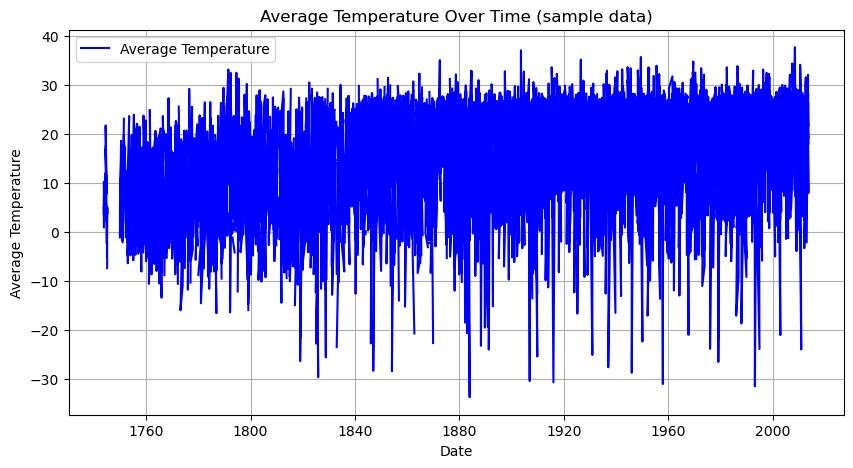

In [18]:

plt.figure(figsize=(10, 5))
plt.plot(sampled_df['dt'], sampled_df['AverageTemperature'], label='Average Temperature', color='b')

plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time (sample data)')
plt.legend()
plt.grid(True)
plt.show()

Bar graph

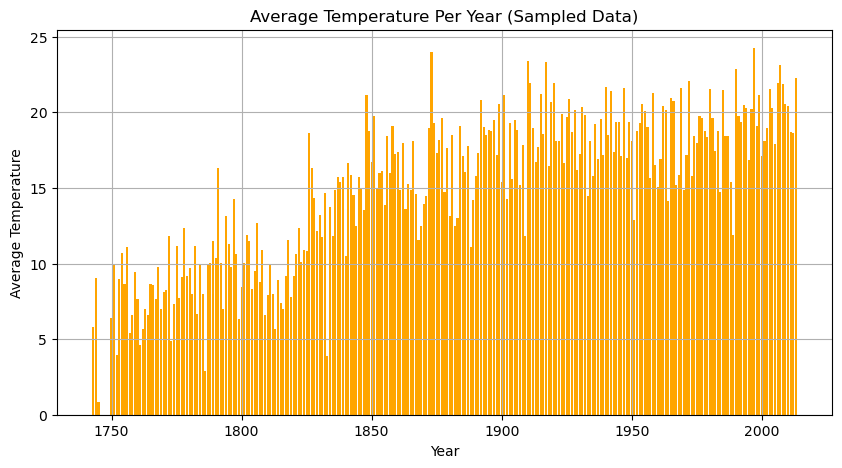

In [17]:
avg_temp_per_year_sampled = sampled_df.groupby('year')['AverageTemperature'].mean().reset_index()

# Bar graph
plt.figure(figsize=(10, 5))
plt.bar(avg_temp_per_year_sampled['year'], avg_temp_per_year_sampled['AverageTemperature'], color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Per Year (Sampled Data)')
plt.grid(True)
plt.show()

Scatter plot:

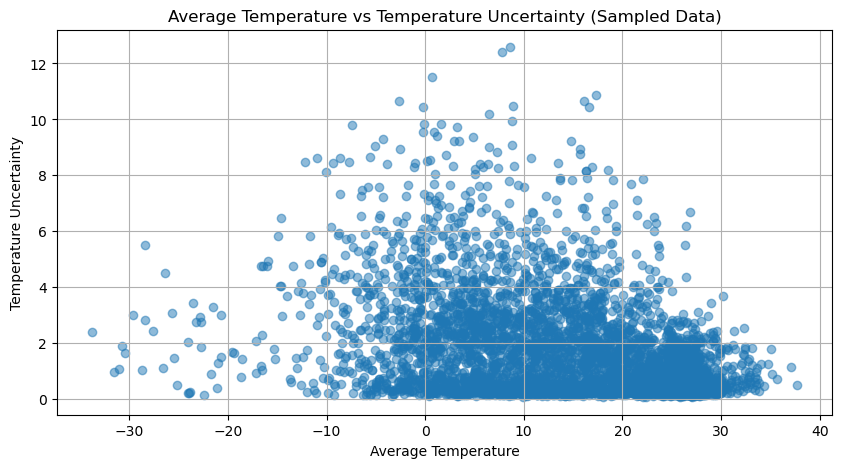

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(sampled_df['AverageTemperature'], sampled_df['AverageTemperatureUncertainty'], alpha=0.5)
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty')
plt.title('Average Temperature vs Temperature Uncertainty (Sampled Data)')
plt.grid(True)
plt.show()

Histogram:

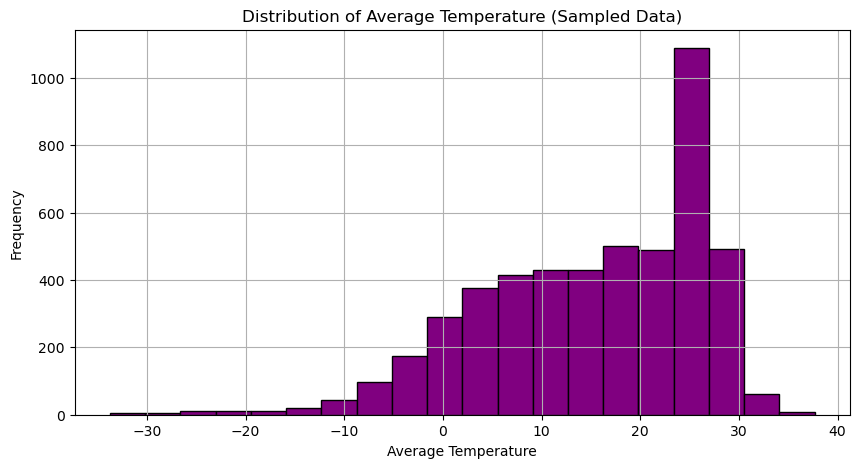

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(sampled_df['AverageTemperature'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature (Sampled Data)')
plt.grid(True)
plt.show()